## Assignment

Nama : Dita Noviyanti

Kelas : IF-42-Gab04

NIM : 1301194125

Import necessary library

In [40]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

In [41]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [42]:
print(plt.style.available)
mpl.style.use(['ggplot']) # optional: for ggplot-like style

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Read the data

In [43]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

Drop unnecessary columns

In [44]:
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603


Rename columns title

In [45]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

Add a 'Total' column

In [46]:
df_can['Total'] = df_can.sum(axis=1)

In [47]:
df_can.set_index('Country', inplace=True)

In [48]:
df_can.index.name = None

In [49]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15


**Question 1:** Let's compare the number of immigrants from India and China from 1980 to 2013.


Step 1: Get the data set for China and India, and display dataframe.

In [50]:
### type your answer here
df_can.loc[["China","India"]]


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904


Step 2: Plot graph. We will explicitly specify line plot by passing in `kind` parameter to `plot()`.

In [51]:
df_can.columns = list(map(str, df_can.columns))

In [52]:
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [53]:
### type your answer here
China = df_can.loc['China', years]
China.head()

1980    5123
1981    6682
1982    3308
1983    1863
1984    1527
Name: China, dtype: object

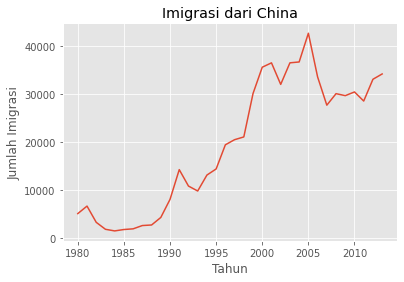

In [54]:
China.index = China.index.map(int)
China.plot(kind='line')

plt.title('Imigrasi dari China')
plt.ylabel('Jumlah Imigrasi')
plt.xlabel('Tahun')

plt.show()

In [55]:
India = df_can.loc['India', years]
India.head()

1980    8880
1981    8670
1982    8147
1983    7338
1984    5704
Name: India, dtype: object

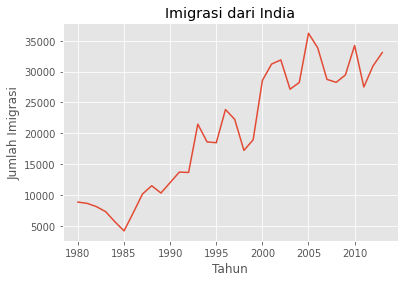

In [56]:
India.index = India.index.map(int)
India.plot(kind='line')

plt.title('Imigrasi dari India')
plt.ylabel('Jumlah Imigrasi')
plt.xlabel('Tahun')

plt.show()

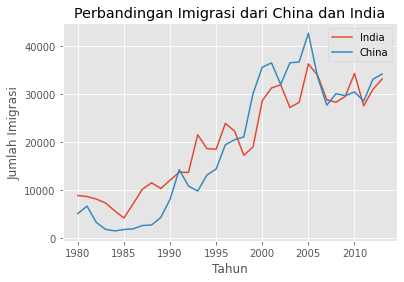

In [57]:
### type your answer here
#compare china india
chinaIndia = df_can.loc[['India','China'],years]
chinaIndia = chinaIndia.transpose()
chinaIndia.index = chinaIndia.index.map(int)
chinaIndia.plot(kind='line')

plt.title('Perbandingan Imigrasi dari China dan India')
plt.ylabel('Jumlah Imigrasi')
plt.xlabel('Tahun')
plt.show()

**Question 2:** Compare the trend of top 5 countries that contributed the most to immigration to Canada.

Step 1: Get the data set for top 5 countries

In [58]:
### type your answer here
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)
topFive = df_can.head()
topFive = topFive[years].transpose()

topFive


,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668
1985,4211,1816,9564,3150,514
1986,7150,1960,9470,4166,691
1987,10189,2643,21337,7360,1072
1988,11522,2758,27359,8639,1334
1989,10343,4323,23795,11865,2261


Step 2: Plot graph

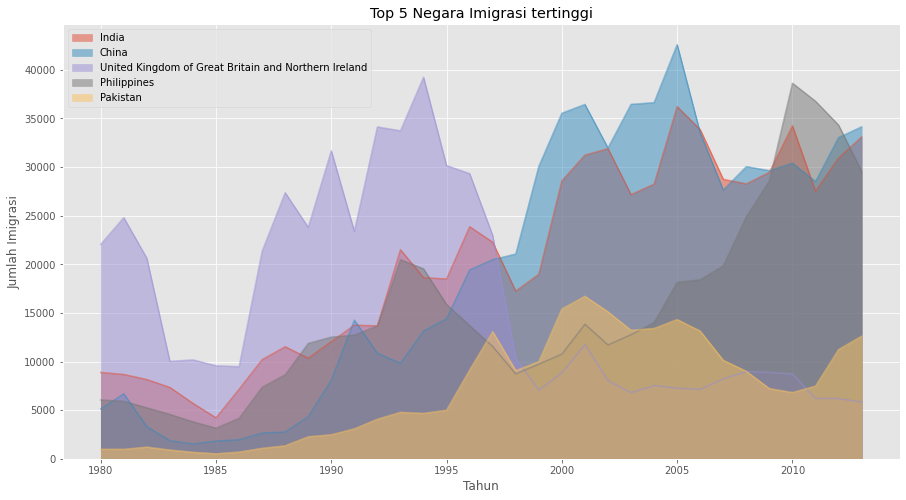

In [59]:
### type your answer here
topFive.index = topFive.index.map(int)
topFive.plot(kind='area',
             stacked=False,
             figsize=(15, 8),
             )

plt.title('Top 5 Negara Imigrasi tertinggi')
plt.ylabel('Jumlah Imigrasi')
plt.xlabel('Tahun')

plt.show()




**Question 3**: Create an unstacked area plot of the 5 countries that contributed the least to immigration to Canada **from** 1980 to 2013. Use a transparency value of 0.55.

In [60]:
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)
topFiveLeast = df_can.tail()
topFiveLeast = topFiveLeast[years].transpose()

topFiveLeast

,San Marino,New Caledonia,Marshall Islands,Western Sahara,Palau
1980,1,0,0,0,0
1981,0,0,0,0,0
1982,0,0,0,0,0
1983,0,0,0,0,0
1984,0,0,0,0,0
1985,0,0,0,0,0
1986,1,0,0,0,0
1987,0,0,0,0,0
1988,0,0,0,0,0
1989,0,0,0,0,0


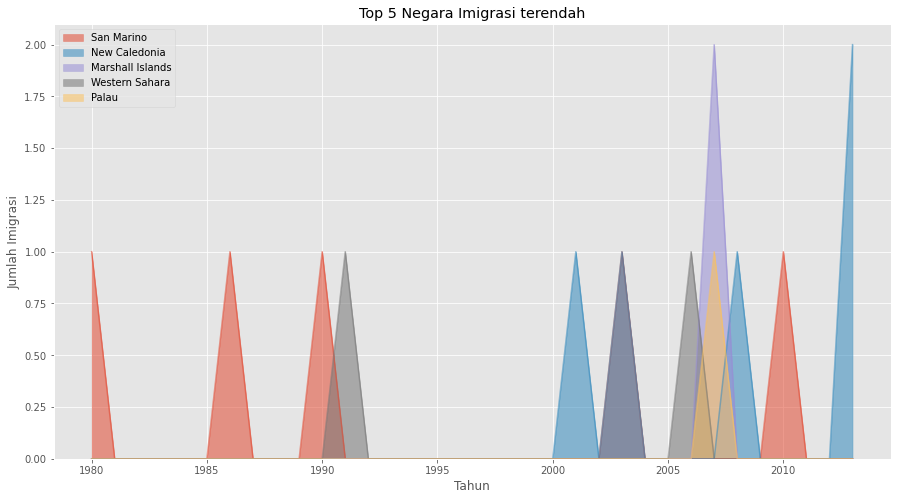

In [61]:
### type your answer here
topFiveLeast.index = topFiveLeast.index.map(int)
topFiveLeast.plot(kind='area',
             alpha=0.55,
             stacked=False,
             figsize=(15, 8),
             )

plt.title('Top 5 Negara Imigrasi terendah')
plt.ylabel('Jumlah Imigrasi')
plt.xlabel('Tahun')

plt.show()




**Question 4**: Display the immigration distribution for Greece, Albania, and Bulgaria for years 1980 - 2013? Use an overlapping plot with 15 bins and a transparency value of 0.35.

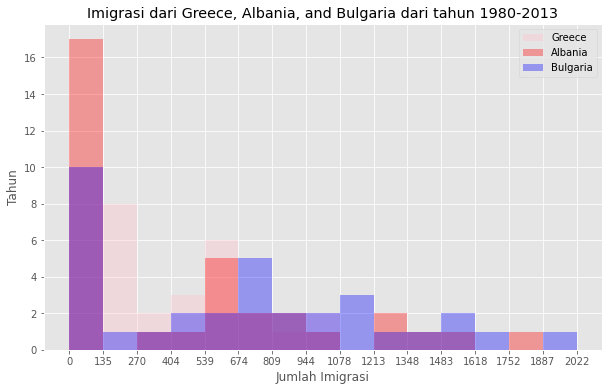

In [62]:
### type your answer here
display3Country = df_can.loc[['Greece', 'Albania', 'Bulgaria'], years]
display3Country = display3Country.transpose()
count, bin_edges = np.histogram(display3Country, 15)
display3Country.plot(kind ='hist',
                      figsize=(10, 6),
                      bins=15,
                      alpha=0.35,
                      xticks=bin_edges,
                      color=['pink', 'red', 'blue']
                      )
plt.title('Imigrasi dari Greece, Albania, and Bulgaria dari tahun 1980-2013')
plt.ylabel('Tahun')
plt.xlabel('Jumlah Imigrasi')
plt.show()




**Question 5:** Create a *horizontal* bar plot showing the *total* number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013. Label each country with the total immigrant count.

Step 1: Get the data pertaining to the top 15 countries.

In [63]:
### type your answer here
df_can.sort_values(by='Total', ascending=False, inplace=True)


topFiveteen = df_can['Total'].head(15)
topFiveteen

India                                                   691904
China                                                   659962
United Kingdom of Great Britain and Northern Ireland    551500
Philippines                                             511391
Pakistan                                                241600
United States of America                                241122
Iran (Islamic Republic of)                              175923
Sri Lanka                                               148358
Republic of Korea                                       142581
Poland                                                  139241
Lebanon                                                 115359
France                                                  109091
Jamaica                                                 106431
Viet Nam                                                 97146
Romania                                                  93585
Name: Total, dtype: int64

Step 2: Plot data:
   1. Use `kind='barh'` to generate a bar chart with horizontal bars.
   2. Make sure to choose a good size for the plot and to label your axes and to give the plot a title.
<!--    3. Loop through the countries and annotate the immigrant population using the anotate function of the scripting interface. -->

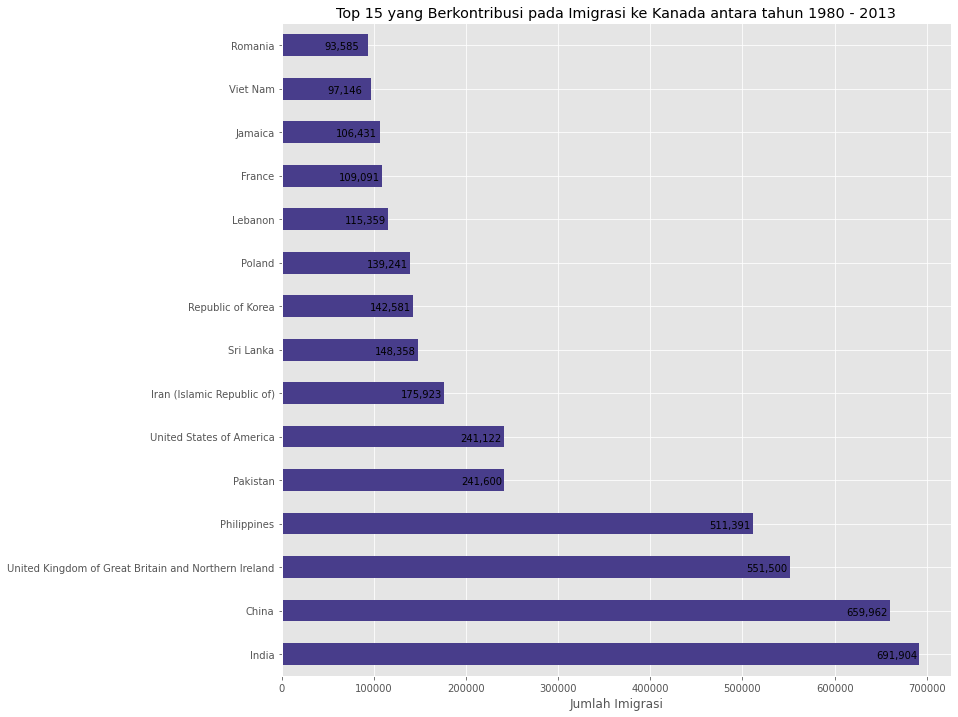

In [64]:
### type your answer here
topFiveteen.plot(kind='barh', figsize=(12, 12), color='darkslateblue')
plt.xlabel('Jumlah Imigrasi')
plt.title('Top 15 yang Berkontribusi pada Imigrasi ke Kanada antara tahun 1980 - 2013')

for index, value in enumerate(topFiveteen): 
    label = format(int(value), ',') # format int with commas
    
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='black')

plt.show()

# Thank you for completing this lab!

<hr>

Copyright &copy; 2019 [Cognitive Class](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).